# 605.621 - Foundations of Algorithms

## The Maximal Clique Problem

Sabbir Ahmed

March 7, 2021

1. Introduction to the algorithm of your choice.
   1.1 Theoretical details about the algorithm and theoretical complexity
  1.2 Details about the algorithm of choice (Why did we study this algorithm? What pieces does it have? Data structures, algorithm strategies? Algorithm kind?)
2. Canonical test data (might be a script to generate it)
   2.1 Sample test data to run with the algorithm (this can be interesting examples to show the utility of the algorithm)
3. The actual code of the algorithm which can indeed run
4. Evaluation plan - empirical

In [1]:
import networkx as nx

In [2]:
G1 = nx.Graph()

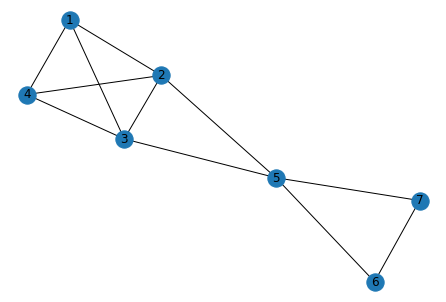

In [3]:
G1.add_nodes_from(range(1, 8))
G1.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [3, 5],
    [5, 3],
    [5, 6],
    [5, 7],
    [6, 7]
])
nx.draw(G1, with_labels=True)

In [4]:
G = nx.gnm_random_graph(7, 15)

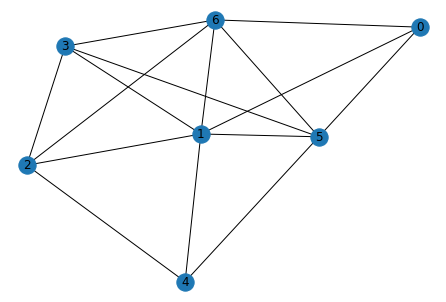

In [5]:
nx.draw(G, with_labels=True)

In [6]:
nodes = G.nodes()
G.remove_node(0)
for node in nodes:
    print(node, list(G[node]))

1 [2, 3, 4, 5, 6]
2 [4, 1, 6, 3]
3 [5, 1, 6, 2]
4 [2, 1, 5]
5 [3, 6, 1, 4]
6 [5, 3, 2, 1]


In [7]:
NEIGHBORS = [
    [],  # I want to start index from 1 instead of 0
    [2, 3, 4],
    [1, 3, 4, 5],
    [1, 2, 4, 5],
    [1, 2, 3],
    [2, 3, 6, 7],
    [5, 7],
    [5, 6],
]
NODES = set(range(1, len(NEIGHBORS)))

In [8]:
def bron_kerbosch(R, P, X, cliques):
    '''Naive Bron–Kerbosch algorithm'''
    if not P and not X:
        cliques.append(R)
        return

    for v in list(P):
        bron_kerbosch(R.union({v}), P.intersection(NEIGHBORS[v]), X.intersection(NEIGHBORS[v]), cliques)
        P.remove(v)
        X.add(v)

In [9]:
def bron_kerbosch(R, P, X, N, cliques, num_recursions):
    num_recursions.inc()
    '''Naive Bron–Kerbosch algorithm'''
    if not P and not X:
        cliques.append(R)
        return

    for v in list(P):
        bron_kerbosch(R.union({v}), P.intersection(set(N(v))), X.intersection(set(N(v))), N, cliques, num_recursions)
        P.remove(v)
        X.add(v)

In [10]:
def pick_random(s):
    if s:
        elem = s.pop()
        s.add(elem)
        return elem

def bron_kerbosch_pivot(R, P, X, N, cliques, num_recursions):
    '''Bron–Kerbosch algorithm with pivot'''
    num_recursions.inc()
    if not P and not X:
        cliques.append(R)
        return

    pivot = pick_random(P) or pick_random(X)

    for v in list(P.difference(N(pivot))):
        bron_kerbosch_pivot(R.union({v}), P.intersection(set(N(v))), X.intersection(set(N(v))), N, cliques, num_recursions)
        P.remove(v)
        X.add(v)

In [11]:
def bron_kerbosch_pivot2(R, P, X, N, cliques, num_recursions):
    '''Naive Bron–Kerbosch algorithm'''
    S = []
    S.append((set(), P, set()))

    while len(S):
        num_recursions.inc()
        R, P, X = S.pop()
        if not P and not X:
            cliques.append(R)

        pivot = pick_random(P) or pick_random(X)

        if pivot:
            v = pick_random(P.difference(N(pivot)))
            if v:
                S.append((R, P, X.union({v})))
                S.append((R.union({v}), P.intersection(N(v)), X.intersection(N(v))))
                P.remove(v)


In [12]:
class NumRecursions():

    def __init__(self):
    
        self.count = 0
    
    def inc(self):
        
        self.count += 1
        
    def tot(self):
        
        return self.count

def test_algo(G, bron_kerbosch_func):
    num_recursions = NumRecursions()
    cliques = []
    bron_kerbosch_func(set(), set(G.nodes()), set(), G.neighbors, cliques, num_recursions)
    print(num_recursions.tot())
    return cliques

In [17]:
test_algo(G, bron_kerbosch)

30


[{1, 2, 3, 6}, {1, 2, 4}, {1, 3, 5, 6}, {1, 4, 5}]

In [18]:
test_algo(G, bron_kerbosch_pivot)

10


[{1, 2, 3, 6}, {1, 2, 4}, {1, 3, 5, 6}, {1, 4, 5}]

In [19]:
test_algo(G, bron_kerbosch_pivot2)

59


[{1, 2, 3, 6}, {1, 2, 4}, {1, 3, 5, 6}, {1, 4, 5}]